# Nutritional Data Analysis
### Part. 2: Exploratory Data Analysis

### Project overview

We will perform a full EDA (Exploratory data Analysis) on a food products dataset to assess the nutritional characteristics of food products sold in France. The project is divided in two parts:

- **1. Data cleaning and pre-processing:** Starting from a big dataset on worldwide food products we will extract a smaller dataset for further analysis
- **2. Exploratory Data Analysis:** Descriptive statistics on food products sold in France

In this second part of the project, we will work on the previously cleaned dataset and perform and exploratory data analysis to assess the nutritional quality of food products sold in France

### Required modules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
donnees = pd.read_csv('data/donnees_fr.csv',index_col=0)
print(donnees.shape)
display(donnees.head())

(61577, 29)


,code,url,product_name,countries_fr,packaging,quantity,brands,pnns_groups_1,pnns_groups_2,ingredients_text,...,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,nb_ingredients
106,36252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,"France,États-Unis",NaN,NaN,Sunridge,Unknown,Unknown,"Milk chocolate coating (evaporated cane juice,...",...,12.5,70.00,57.5,2.5,2.50,0.09652,0.038000,22.0,22.0,10.0
138,39529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,"France,États-Unis",NaN,NaN,"Twix, Lundberg",Unknown,Unknown,NaN,...,NaN,77.08,NaN,6.2,6.25,NaN,NaN,NaN,NaN,NaN
190,10187319,http://world-fr.openfoodfacts.org/produit/0000...,Mini Confettis,France,NaN,NaN,Alice Délice,Unknown,Unknown,NaN,...,0.8,NaN,87.7,0.9,0.60,0.01000,0.003937,14.0,14.0,NaN
191,10207260,http://world-fr.openfoodfacts.org/produit/0000...,Praliné Amande Et Noisette,France,NaN,NaN,Alice Délice,Unknown,Unknown,NaN,...,2.9,NaN,50.3,3.9,9.50,0.00300,0.001181,14.0,14.0,NaN
226,40608754,http://world-fr.openfoodfacts.org/produit/0000...,"Pepsi, Nouveau goût !",France,Canette aluminium,15 cl,Pepsi,Beverages,Sweetened beverages,"Eau gazéifiée, sucre, colorant caramel E150d, ...",...,0.0,10.40,10.4,0.0,0.00,0.02540,0.010000,13.0,2.0,6.0


Our dataset contains 61,577 lines (food products sold in France) and 29 variables (categorical and numerical). 

In [3]:
donnees.columns

Index(['code', 'url', 'product_name', 'countries_fr', 'packaging', 'quantity',
       'brands', 'pnns_groups_1', 'pnns_groups_2', 'ingredients_text',
       'additives_fr', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'nb_ingredients'],
      dtype='object')

First variables are categorical variables and next variables are numerical variables like various nutrient contents

# 1. How to assess the nutritional quality of a food product?

### Healthy diet

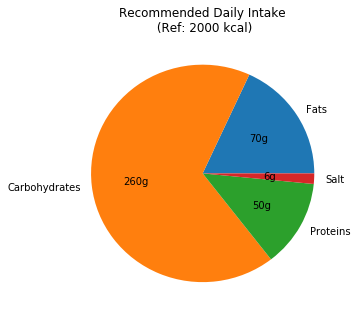

In [4]:
tmp = pd.DataFrame({'Nutrients':['Fats', 'Carbohydrates', 'Proteins', 'Salt'], 'Proportions':[70, 260, 50, 6]})
def autopct_format(values):
    '''convert the percentages pct
    generated by autopct
    into actual values'''
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}g'.format(v=val)
    return my_format
fig = plt.figure(figsize=(5,5))
plt.pie(tmp['Proportions'], labels=tmp['Nutrients'], autopct = autopct_format(tmp['Proportions']))
plt.title('Recommended Daily Intake\n (Ref: 2000 kcal)')
plt.show()

What is a healthy diet?

A first clue is given by the Recommended Daily Intake established by European Union (NB: Recommendations can vary depending on countries). For an average-sized man the RDI is 2000 kcal (8400 kJ) composed of carbodydrates for two thirds and fats and proteins for the last third.

Obviously, consumption of healthy food products should ideally lead to a daily intake of energy and nutrients close to the recommended one.

### Nutrition scores

UK and France Health administrations use various indices to rank food products from healthy to unhealthy. Three indices are given in the dataset.
*UK Nutrition score*, *FR Nutrition score* and *FR Nutrition grades (NutriScore)*.

Nutrition scores are synthetic indexes assessing whether a product is healthy (low values) or unhealthy (high values) while nutrition grade (NutriScore) is a categorical index (5 levels) bringing the same information.

The calculation of the indexes is based on Energy and main nutrient contents. 

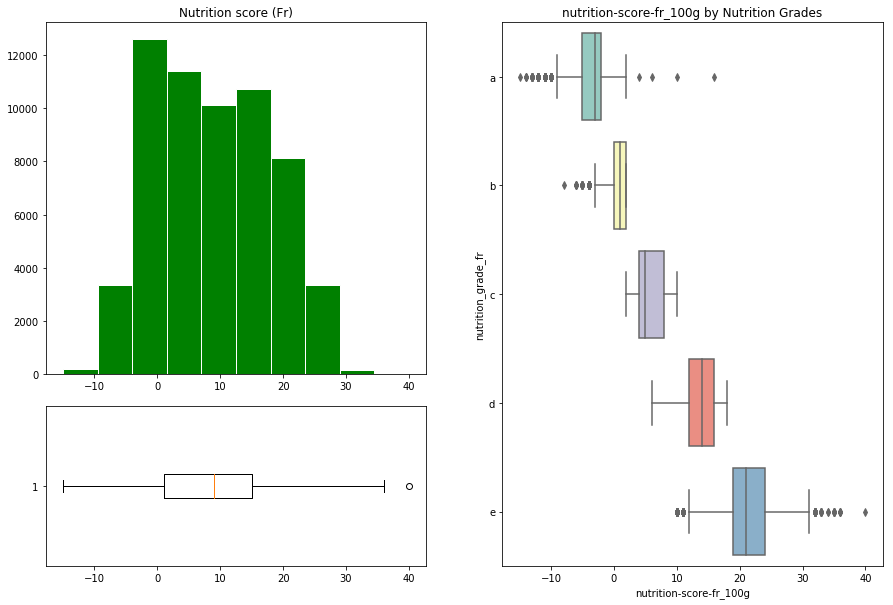

[1501 missing values]


In [5]:
    tmp = donnees['nutrition-score-fr_100g'][pd.isnull(donnees['nutrition-score-fr_100g'])==False]
    
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot2grid((3, 2), (0, 0), rowspan=2)
    plt.hist(tmp, color='green', edgecolor='white')
    plt.title('Nutrition score (Fr)')
        
    plt.subplot2grid((3, 2), (2, 0))
    plt.boxplot(tmp,vert=False);
        
    plt.subplot2grid((3, 2), (0, 1),rowspan=3)
    ax = sns.boxplot(x='nutrition-score-fr_100g', y='nutrition_grade_fr', 
                data=donnees.sort_values(by='nutrition_grade_fr'), palette="Set3")
    ax.set_title('nutrition-score-fr_100g'+' by Nutrition Grades')
    
    plt.show()
    n_nan = sum(pd.isnull(donnees['nutrition-score-fr_100g']))
    print('[{} missing values]'.format(n_nan))

The calculation of the French Nutrition score slightly differs from the UK ones but the conclusions are similar. Overall, the distribution of the values shows a slight bimodality: food products can be divided into a rather healthy group (values around 0) and a less healthy group (values around 15).
![Nutriscore](https://upload.wikimedia.org/wikipedia/commons/7/7d/Nutri-score-A.svg)
NutriScore (labelled as 'nutrition_grade_fr' in the dataset) is a french nutrition grade ranking food products into 5 categories from A (healthy) to E (unhealthy) and the label is expected to appear progressively on every food product sold in France. We can see on the grouped boxplot that the classification into the 5 grades closely follows the values of the continuous nutrition scores. The main goal of this categorical classification is to provide an easily available information to customers

Simply put, grade 'A' promotes raw products, proteins, fibers and vegetable while high contents in energy, saturated fats, salt and suger will lead to worst grades. They take into account the daily recommended intake of nutrients and energy but also the nature of the food product (eg promotion of vegetables rather than saturated fats).

## 2. Categorical variables: Brands and products categories

### Brands

Number of brands:  12856 



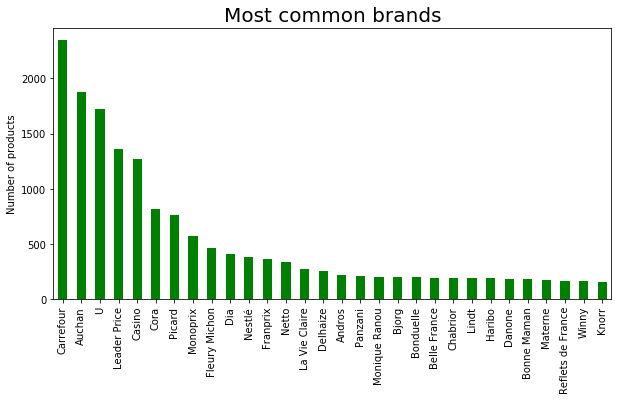

In [6]:
print('Number of brands: ',pd.unique(donnees['brands']).shape[0],'\n')
brands = donnees['brands'].value_counts(dropna=True)\
    .sort_values(ascending=False)
fig = plt.figure(figsize=(10,5))
brands[:30].plot(kind = 'bar', color='green')
plt.title('Most common brands',fontsize=20)
plt.ylabel('Number of products')
plt.show()

The first 8 most common brands in the dataset (from 'Carrefour' to 'Monoprix') are the own brands of the supermarkets. Next come big companies like 'Nestlé'

### categories of products

In [7]:
pd.DataFrame(donnees['pnns_groups_1'].value_counts())

,pnns_groups_1
Unknown,21214
Sugary snacks,7629
Composite foods,5232
Milk and dairy products,5165
Cereals and potatoes,5142
Fish meat eggs,4772
Beverages,4468
Fruits and vegetables,3270
Fat and sauces,2874
Salty snacks,1811


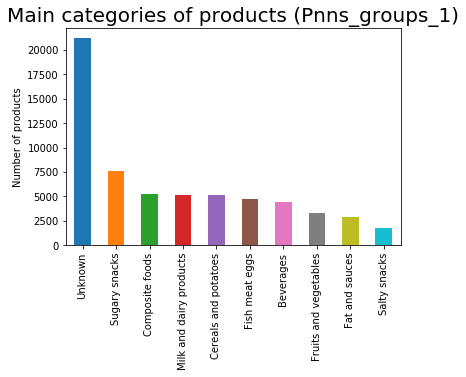

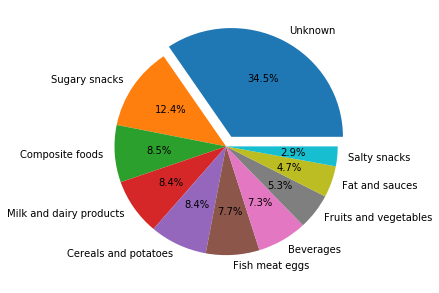

In [8]:
donnees['pnns_groups_1'].value_counts().plot(kind = 'bar')
plt.title('Main categories of products (Pnns_groups_1)',fontsize=20)
plt.ylabel('Number of products')

fig = plt.figure(figsize=(5,5))
vect = pd.DataFrame(donnees['pnns_groups_1'].value_counts(dropna=False))
plt.pie(vect, labels=vect.index, autopct='%1.1f%%',
        explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),)
plt.show()

Food products are distributed in 9 main categories. About a third of the data have an unknown category.
'Sugary Snacks' is the most populated category, 'Salty Snacks' come last.

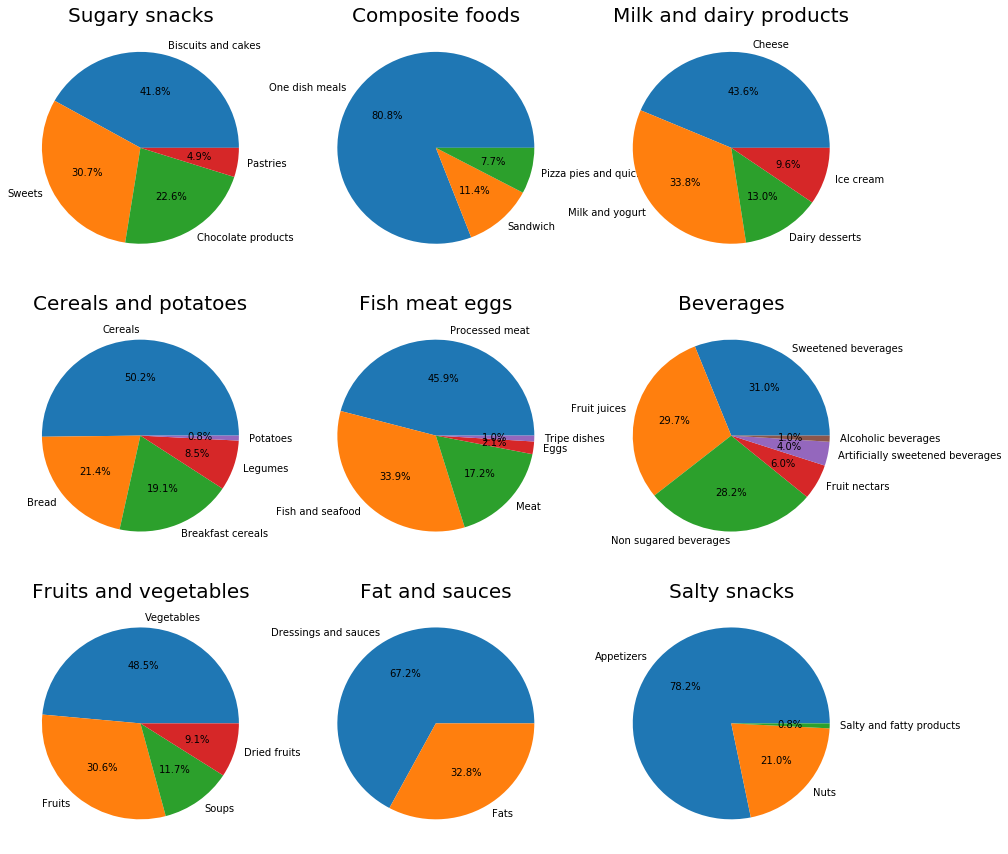

In [9]:
vect = pd.DataFrame(donnees['pnns_groups_1'].value_counts(dropna=False))
fig = plt.figure(figsize=(15,15))
for i in range(vect.shape[0]-1):
    pnns1 = vect.index[i+1]
    dat_fig = pd.DataFrame(donnees[donnees['pnns_groups_1']==pnns1]\
                           ['pnns_groups_2'].value_counts(dropna=False))
    plt.subplot(3,3,i+1)
    plt.pie(dat_fig, labels=dat_fig.index, autopct='%1.1f%%')
    plt.title(pnns1,fontsize=20)
plt.show()

Each of the 9 main categories can be further subdivided into 2 to 5 sub-categories (Pnns2). For instance the 'Milk and Dairy Products' are composed of:
- 'Cheese' (43.6%)
- 'Milk and Yogurt' (33.8%)
- 'Dairy Desserts' (13.0%)
- 'Ice Cream' (9.6%)

# 3. Energy and Nutrient contents 

Energy and nutrient contents of the products are the main variables to decide whether a food product contributes to an healty diet or not. We will review those contents (energy and main nutrients) for all food products together with the importance of each nutrient in the Nutriscore ranking.

As we will repeat several times the same graphical plots, let's write a convenient plotting function

In [10]:
def graph_fct2(dat, rdi=None):
    '''plot an histogram and a boxplot
    to quickly see the distribution of the data
    Ignores NA values
    if rdi is given: represents values as a ratio of the RDI '''
    tmp = donnees[dat][pd.isnull(donnees[dat])==False]
    if rdi is not None:
        tmp = tmp/rdi*100
    
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot2grid((3, 2), (0, 0), rowspan=2)
    plt.hist(tmp, color='green', edgecolor='white')
    title_str = dat
    if rdi is not None:
        title_str= dat + ' (% of recommended daily intake)'
    plt.title(title_str)
        
    plt.subplot2grid((3, 2), (2, 0))
    plt.boxplot(tmp,vert=False);
        
    plt.subplot2grid((3, 2), (0, 1),rowspan=3)
    ax = sns.boxplot(x=dat, y='nutrition_grade_fr', 
                data=donnees.sort_values(by='nutrition_grade_fr'), palette="Set3")
    ax.set_title(dat+' by Nutrition Grades')
    
    plt.show()
    n_nan = sum(pd.isnull(donnees[dat]))
    print('[{} missing values]'.format(n_nan))

### Energy content pr 100 g (kcal)

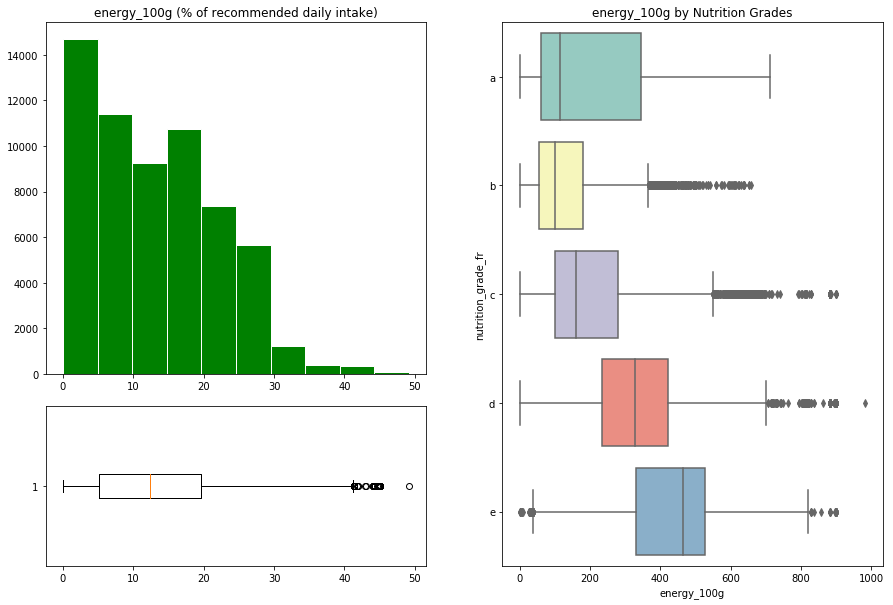

[456 missing values]


In [11]:
graph_fct2('energy_100g',2000)

The distribution of the energy contents of the food products shows a slight bimodality: a first group of low energy products and a group of product rich in energy.

The NutriScore classification is clearly affected by energy content: the lower is the energy content, the healthier is the product in this ranking. We can note that the best grade 'A' accepts a significant variability.

### Carbohydrates
**1. Total carbohydrates** ![Carbohydrates](../external_data/carbohydrates.jpg)

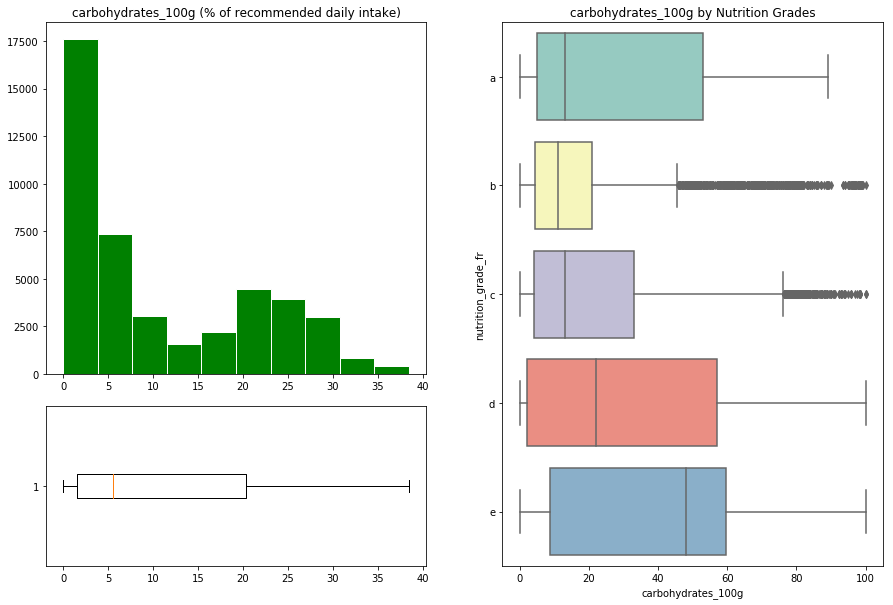

[17129 missing values]


,pnns_groups_1
Sugary snacks,4790
Cereals and potatoes,3054
Unknown,1633
Salty snacks,950
Fruits and vegetables,213
Beverages,206
Composite foods,94
Fat and sauces,30
Milk and dairy products,6


In [12]:
graph_fct2('carbohydrates_100g',260)

tmp = donnees[donnees['carbohydrates_100g']>50 ]
pd.DataFrame(tmp[tmp['carbohydrates_100g']<80]['pnns_groups_1'].value_counts())

We can clearly see two groups of product depending on carbohydrates contents. The products rich in carbohydrates are cereals products and sugary snacks

Carbohydrates content in itself isn't an important criteria for the nutriscore ranking.

**2. Sugars**

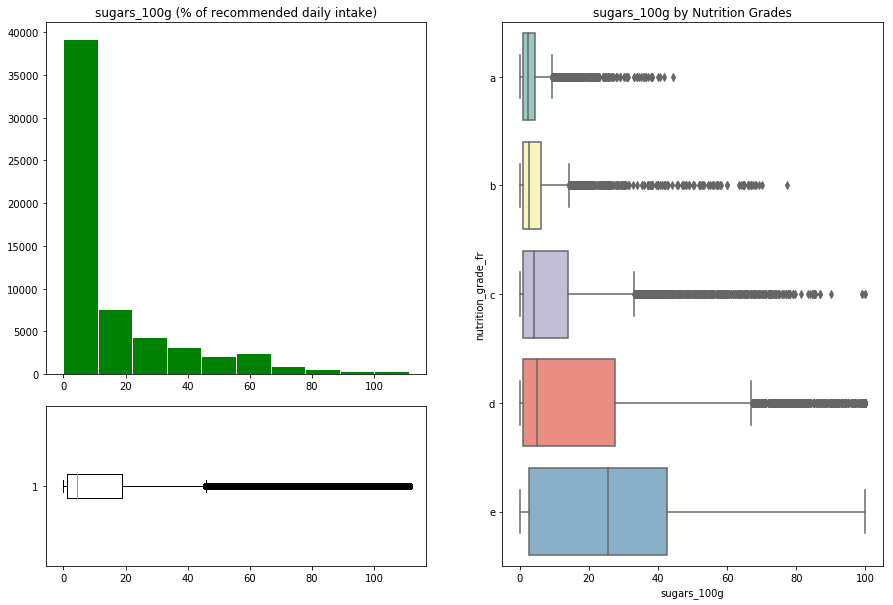

[490 missing values]


,pnns_groups_1
Sugary snacks,3361
Unknown,2637
Beverages,345
Fruits and vegetables,225
Cereals and potatoes,29
Fat and sauces,29
Salty snacks,13
Milk and dairy products,9


In [13]:
graph_fct2('sugars_100g',90)
tmp = donnees[donnees['sugars_100g']>40 ]
display(pd.DataFrame(tmp[tmp<80]['pnns_groups_1'].value_counts()))

Sugars are a sub-category of carbohydrates. Most products don't have high sugar content and products with sugar content higher than 40% are mainly sugary snacks.

High contents in sugars lead to 'unhealthy' classification: above 20% of sugars content, a food product will be ranked 'D' or 'E'. However, a low sugar content doesn't necessarily grant a 'healthy' classification. 

We need sugars in our diet but in too high quantity they can have undesirable health effects therefore our daily carbohydrate intake should come first from cereals or pasta.

**3. Fibers**

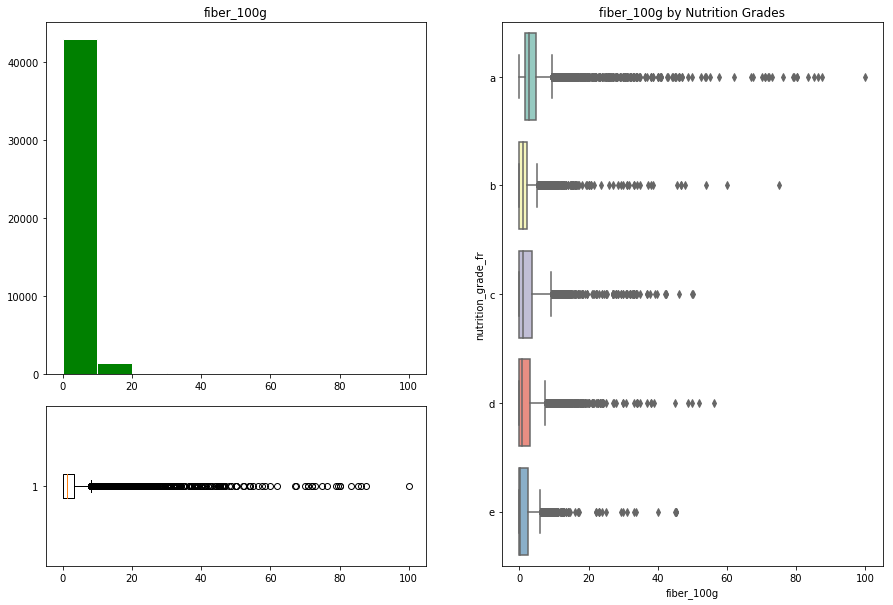

[16791 missing values]


,code,url,product_name,countries_fr,packaging,quantity,brands,pnns_groups_1,pnns_groups_2,ingredients_text,...,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,nb_ingredients
229692,3380380057649,http://world-fr.openfoodfacts.org/produit/3380...,Mix'Gom,France,NaN,60 g,Ma vie sans gluten,Unknown,Unknown,NaN,...,0.13,NaN,0.0,85.20,1.80,0.6250,0.246063,-4.0,-4.0,NaN
241333,3564700158449,http://world-fr.openfoodfacts.org/produit/3564...,Champignons noirs déshydratés,France,NaN,25 g,Tables du monde,Unknown,Unknown,NaN,...,0.01,NaN,1.0,79.50,7.50,0.0880,0.034646,-7.0,-7.0,NaN
244661,3590670000174,http://world-fr.openfoodfacts.org/produit/3590...,Noix sèches,France,NaN,NaN,Pepinoix,Unknown,Unknown,Noix sèches,...,0.00,0.00,0.0,100.00,0.00,0.0000,0.000000,-5.0,-5.0,1.0
251364,3760020501518,http://world-fr.openfoodfacts.org/produit/3760...,Agar-agar,France,Carton,45 g (3 g x 15),"Karéléa,Léa Nature",Fish meat eggs,Fish and seafood,agar-agar (Gracilaria sp.),...,0.00,0.50,0.0,86.20,0.60,0.0381,0.015000,-5.0,-5.0,1.0
251414,3760020504717,http://world-fr.openfoodfacts.org/produit/3760...,Konjac Cuisine,France,"Boîte,Carton",18 g (3 * 8 g),"Karéléa,Léa Nature",Unknown,Unknown,Poudre de Konjac (50%) ; fibre de chicorée.,...,0.00,4.85,0.0,87.50,0.75,0.1270,0.050000,-3.0,-3.0,1.0
252847,3760087360585,http://world-fr.openfoodfacts.org/produit/3760...,Psyllium Blond,France,"Sachet,Papier",200 g,Ethnoscience,Unknown,Unknown,Poudre de téguments de psyllium blond (plantag...,...,0.00,1.80,0.0,80.15,7.80,0.0000,0.000000,-9.0,-9.0,1.0
252862,3760087361230,http://world-fr.openfoodfacts.org/produit/3760...,Psyllium Blond En Poudre Bio - 600 G - Ethnosc...,France,NaN,NaN,Ethnoscience,Unknown,Unknown,NaN,...,0.00,NaN,1.8,80.15,7.80,0.0000,0.000000,-9.0,-9.0,NaN
279257,5411788045759,http://world-fr.openfoodfacts.org/produit/5411...,Agar-Agar,France,"Sachet,Etui,Carton",12 g (6 * 2 g),Lima,Fish meat eggs,Fish and seafood,Agar-Agar.,...,0.00,4.20,0.0,83.30,1.00,0.0800,0.031496,-3.0,-3.0,1.0
284470,6931653107010,http://world-fr.openfoodfacts.org/produit/6931...,Nâmmèo Oreilles de Judas Séchées,"France,Suisse",NaN,50 g,NaN,Unknown,Unknown,Oreilles de Judas,...,0.10,1.00,0.5,79.00,7.00,0.0800,0.031496,-7.0,-7.0,1.0
313036,8695876150106,http://world-fr.openfoodfacts.org/produit/8695...,Peyman Bahceden Kuru Uzum / Raisin - 200 GR,France,NaN,NaN,Pas De Licence Bio,Unknown,Unknown,NaN,...,0.45,NaN,0.1,76.25,2.70,0.1000,0.039370,-3.0,-3.0,NaN


In [14]:
graph_fct2('fiber_100g')
tmp = donnees['fiber_100g'][pd.isnull(donnees['fiber_100g'])==False]
donnees.loc[tmp[tmp>75].index]

Fibers are another sub-category of carbohydrates. We don't really digest them thus they aren't an important source of energy for us but they have some benefits like stimulating intestinal transit. Therefore, Nutriscore classification promotes products with fiber contents

Only a few products have really high fiber contents. They are used for instance in cooking as thickeners for sauces.

### Fats content

**1. Total fats** ![Fatss](../external_data/fats.jpg)

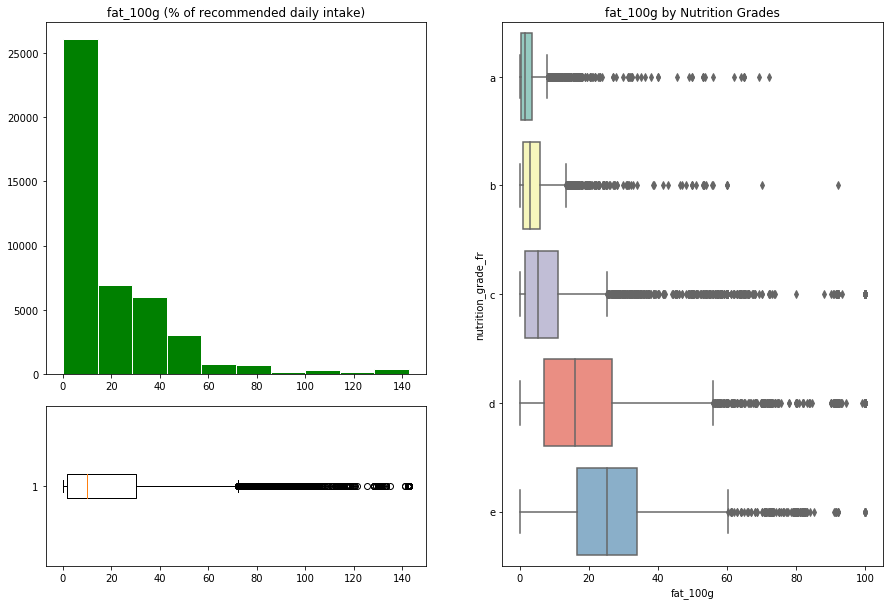

[17059 missing values]


,pnns_groups_2
Fats,552
Dressings and sauces,18
Unknown,16
Legumes,1


In [15]:
graph_fct2('fat_100g',70)
display(pd.DataFrame(donnees[donnees['fat_100g']>80]['pnns_groups_2'].value_counts()))

Most products don't have high contents in fats, the exception being products like vegetal oils or butter which are only composed of fats.

While fats are expected in a healthy diet, they are often too abundant in our diet and products rich in fats are therefore clearly not recommended by the nutriscore ranking: above 20% of fats content, a food product will be ranked 'D' or 'E'.

In [16]:
donnees[(donnees['fat_100g']>80) & (donnees['pnns_groups_2']=='Legumes')]

,code,url,product_name,countries_fr,packaging,quantity,brands,pnns_groups_1,pnns_groups_2,ingredients_text,...,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,nb_ingredients
197544,3175681845060,http://world-fr.openfoodfacts.org/produit/3175...,Lécithine de soja,France,"Boite,Métal",175 g,Gerblé,Cereals and potatoes,Legumes,Lécithine de _soja_.,...,19.0,6.2,6.2,0.0,0.0,0.03,0.011811,20.0,20.0,1.0


**2. Saturated Fats**

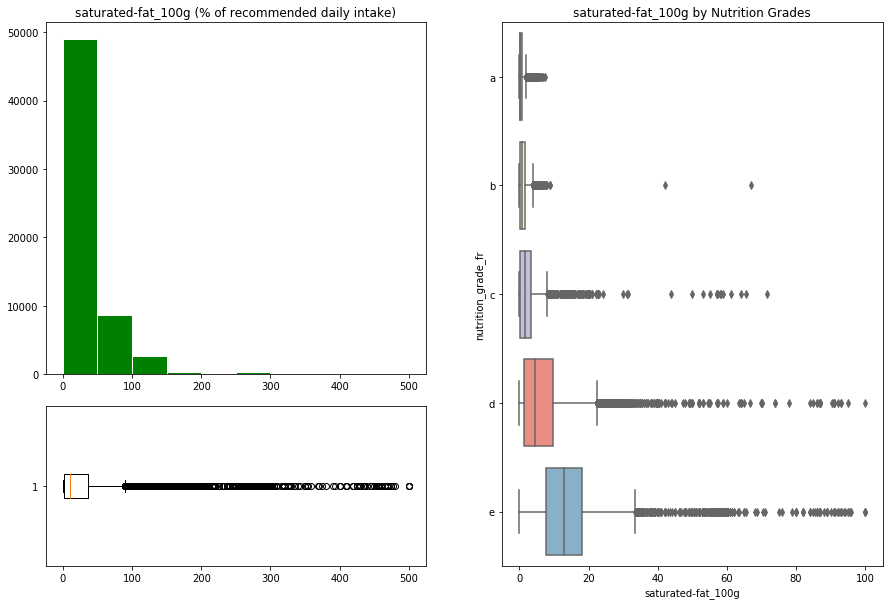

[519 missing values]


In [17]:
graph_fct2('saturated-fat_100g',20)

Saturated fats are a sub-category of fats, and come mainly from an animal source. Current health recommendations are to limit the amount of saturated fats in our diet and products rich in saturated fats are consequently ranked as 'unhealthy'.

### Proteins ![Proteins](../external_data/proteins.jpg)

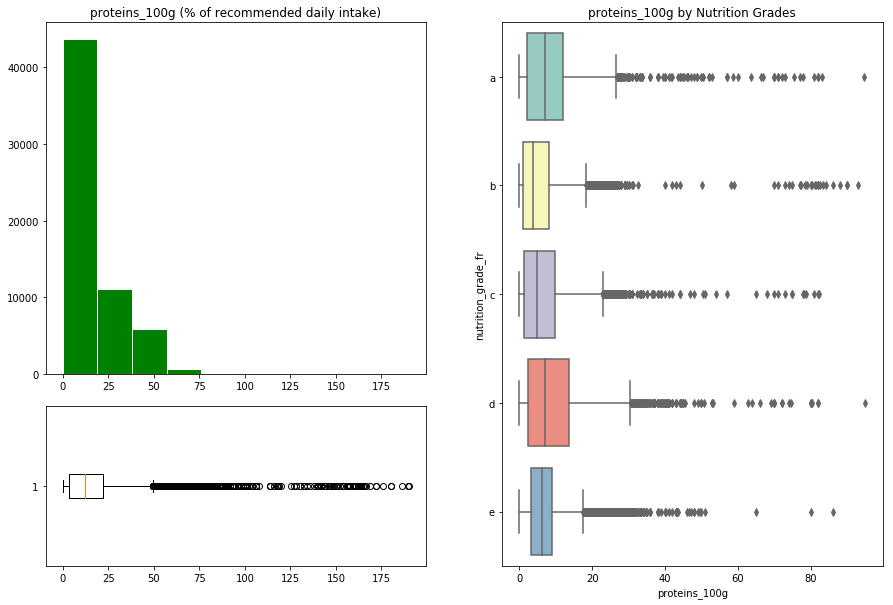

[160 missing values]


In [18]:
graph_fct2('proteins_100g',50)

Most products have less than 25% of proteins content. Protein contents in itself doesn't have a major effect on the NutriScore ranking.

### Minerals

**1. Salt (NaCl)**

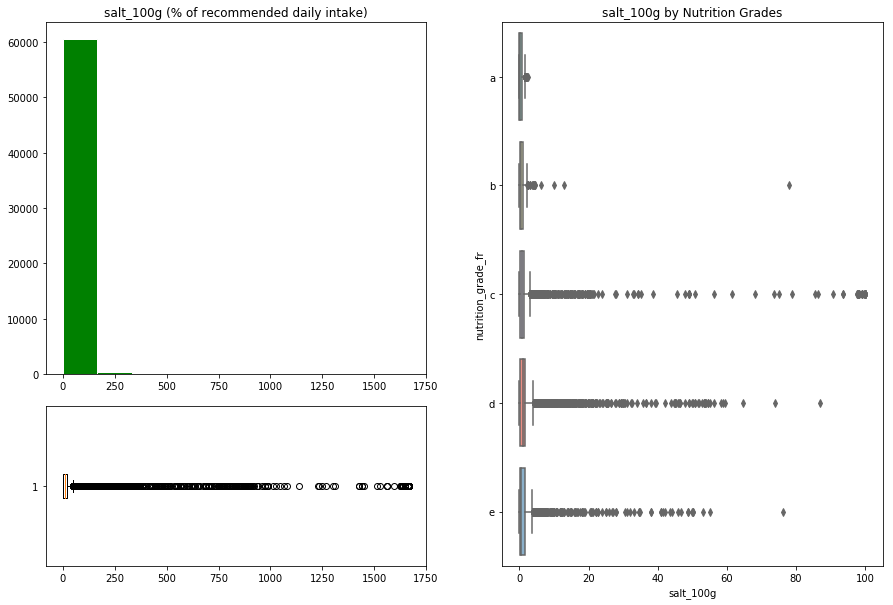

[423 missing values]


In [19]:
graph_fct2('salt_100g',6)

Salt isn't the main component of food product thus we observe low content values ....except for common table salt, obviously composed exclusively (or almost) of salt!

Recommended Daily Intake of salt is only 6g and salt is present in numerous food products therefore even at low content, this is a parameter to watch closely.

**2. Sodium (Na)**

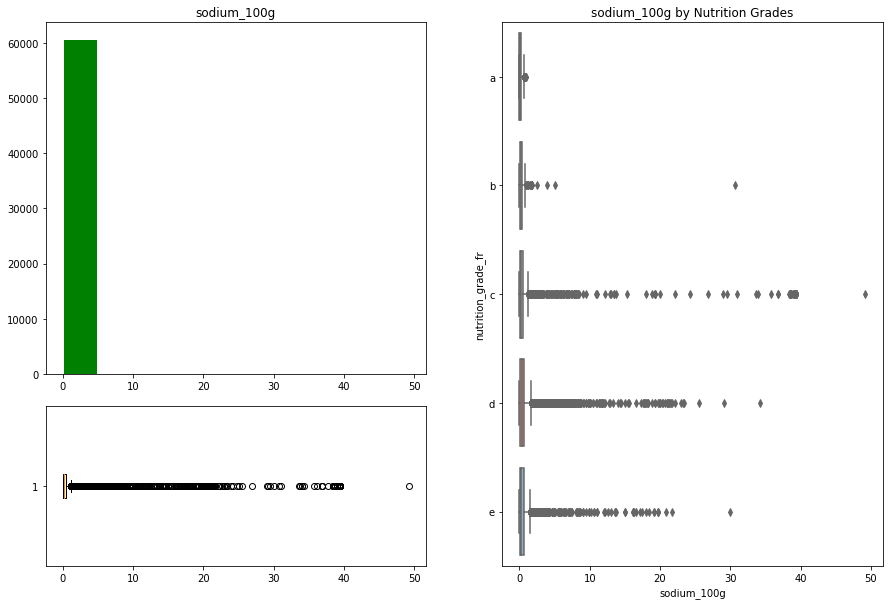

[423 missing values]


In [22]:
graph_fct2('sodium_100g')

Distribution of Sodium contents appears very similar to salt (NaCl) contents, salt being likely the main source of sodium in food products.



# 4.Relations between variables

Is there some interesting relations between variables? Let's start with a large screening using 'pairplot' function.
(*NB: this screening is performed on a subpart of the dataset which contains no NA*)

[34490 removed lines with missing values]


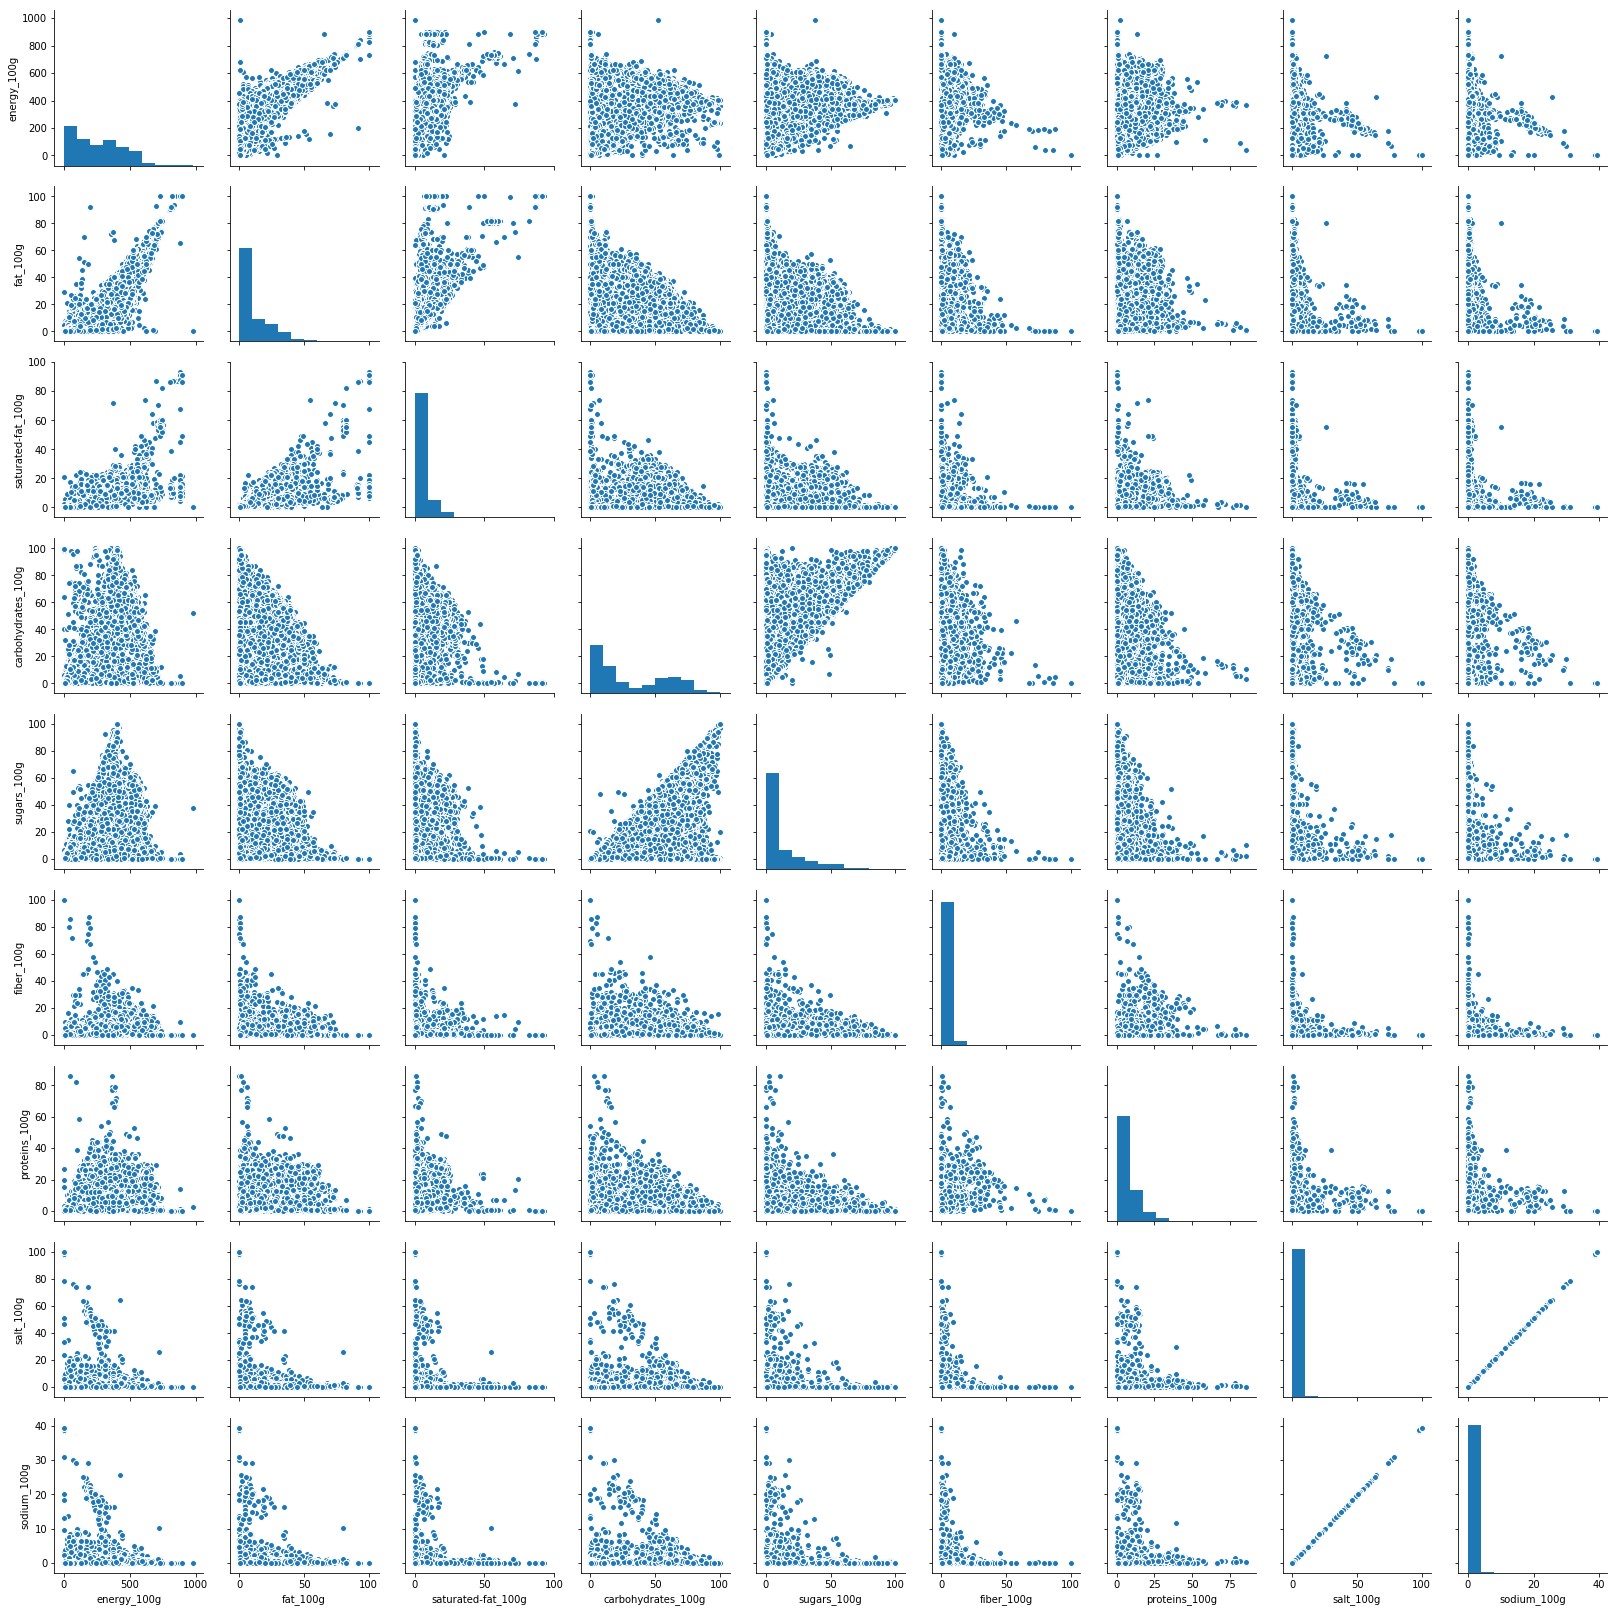

In [23]:
df = donnees.loc[:,'energy_100g':'sodium_100g']
print('[{} removed lines with missing values]'.format(len(df[pd.isnull(df).sum(axis=1)>0])))
sns.pairplot(df[pd.isnull(df).sum(axis=1)==0]);

A first observation is that several relations show a 'triangle-shaped' area. Let's have a closer look.

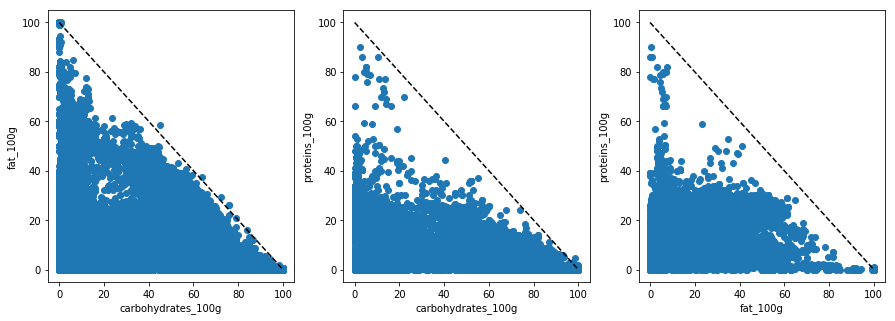

In [24]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(donnees['carbohydrates_100g'],donnees['fat_100g'])
plt.plot([0,100],[100,0], color='black', ls='--')
plt.xlabel('carbohydrates_100g')
plt.ylabel('fat_100g')
plt.subplot(1,3,2)
plt.scatter(donnees['carbohydrates_100g'],donnees['proteins_100g'])
plt.plot([0,100],[100,0], color='black', ls='--')
plt.xlabel('carbohydrates_100g')
plt.ylabel('proteins_100g')
plt.subplot(1,3,3)
plt.scatter(donnees['fat_100g'],donnees['proteins_100g'])
plt.plot([0,100],[100,0], color='black', ls='--')
plt.xlabel('fat_100g')
plt.ylabel('proteins_100g')
plt.show()

The three macro-nutrients Carbohydrates, fats and proteins are the main components of organic matter. The sum of the three contents will thus be close to 100 for all food products and the relations between 2 nutrient contents will necessary be in a triangle:
- each nutrient content is bounded between 0 and 100
- the sum of two nutrient can't be higher than 100

We can see than food products represents a wide diversity of macro-nutrient contents combinations and we can't reliably predict the content of a given macro-nutrient based on another macro-nutrient content.

In [25]:
donnees.loc[:,'energy_100g':'sodium_100g'].corr(method='pearson')

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
energy_100g,1.000000,0.785486,0.582212,0.519750,0.339146,0.240107,0.221215,-0.025437,-0.025977
fat_100g,0.785486,1.000000,0.739437,-0.075825,-0.003513,0.070642,0.139348,0.010883,0.010142
saturated-fat_100g,0.582212,0.739437,1.000000,-0.029810,0.069486,-0.014572,0.138621,-0.002501,-0.002819
carbohydrates_100g,0.519750,-0.075825,-0.029810,1.000000,0.638999,0.250820,-0.134957,-0.085967,-0.085625
sugars_100g,0.339146,-0.003513,0.069486,0.638999,1.000000,0.022190,-0.257082,-0.100463,-0.099998
fiber_100g,0.240107,0.070642,-0.014572,0.250820,0.022190,1.000000,0.169640,-0.024563,-0.024712
proteins_100g,0.221215,0.139348,0.138621,-0.134957,-0.257082,0.169640,1.000000,0.091290,0.090072
salt_100g,-0.025437,0.010883,-0.002501,-0.085967,-0.100463,-0.024563,0.091290,1.000000,1.000000
sodium_100g,-0.025977,0.010142,-0.002819,-0.085625,-0.099998,-0.024712,0.090072,1.000000,1.000000


Among all relations between paired variables, a few interesting correlations can be noticed.

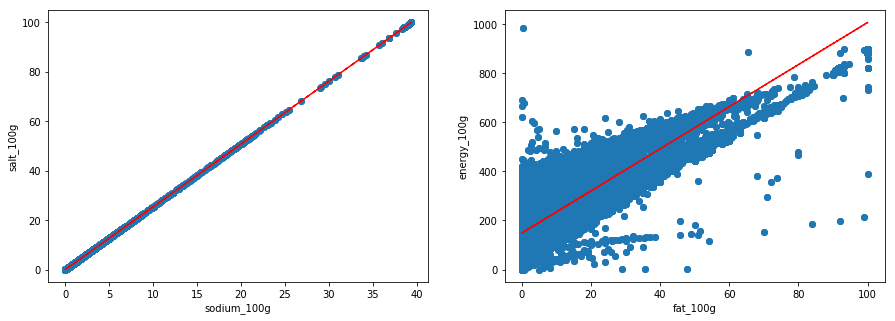

In [26]:
from sklearn import linear_model
def plot_regr(y_var, x_var):
    regr = linear_model.LinearRegression()
    tmp = donnees.loc[:,[y_var,x_var]]

    Y = tmp[pd.isnull(tmp).sum(axis=1)==0][y_var]
    X = tmp[pd.isnull(tmp).sum(axis=1)==0][[x_var]]
    X = X.copy() # On modifiera X, on en crée donc une copie
    regr.fit(X, Y)

    plt.scatter(donnees[x_var],donnees[y_var])
    plt.plot(donnees[x_var], donnees[y_var], "o")
    plt.plot(X,regr.predict(X), color='red', ls='--')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_regr('salt_100g', 'sodium_100g')
plt.subplot(1,2,2)
plot_regr('energy_100g', 'fat_100g')
plt.show()

For instance we can see:

- perfect correlation between salt and sodium contents

This relation isn't informative, the salt (NaCl) is obviously the only source of sodium in this dataset and the two variables are redundant.

- Energy as a function of fat contents

Fats contents could be use to estimate the energy content of a product. To be more complete, we can have a good confidence that a fat-rich product will have a high energetic value. Conversely, knowing that a product has a low fat content isn't as much informative: fats are the most energetic nutrients but the not the only source of energy

# 5. Scores by categories of products

nutrition_grade_fr,a,b,c,d,e
pnns_groups_1,,,,,
Beverages,0.030712,0.113774,0.289670,0.169614,0.396231
Cereals and potatoes,0.506168,0.160167,0.201154,0.119578,0.012933
Composite foods,0.234578,0.317229,0.274506,0.160711,0.012977
Fat and sauces,0.026533,0.065973,0.257798,0.440660,0.209035
Fish meat eggs,0.092377,0.130276,0.281438,0.296512,0.199397
Fruits and vegetables,0.713372,0.176583,0.100128,0.009597,0.000320
Milk and dairy products,0.073788,0.180020,0.260930,0.442730,0.042532
Salty snacks,0.023021,0.034250,0.266704,0.510387,0.165637
Sugary snacks,0.006509,0.033741,0.089134,0.384697,0.485919


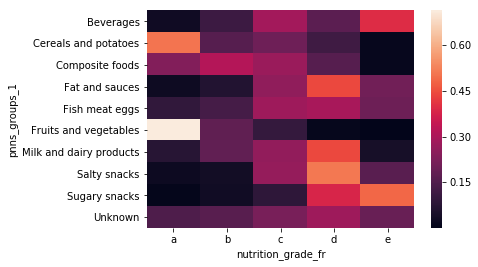

In [27]:
tmp = donnees[['pnns_groups_1','nutrition_grade_fr']].pivot_table(index='pnns_groups_1',columns='nutrition_grade_fr',aggfunc=len)
tmp2 = pd.Series(tmp.sum(axis=1))
display(tmp.mul(1/tmp2,axis=0))
sns.heatmap(tmp.mul(1/tmp2,axis=0))
plt.show()

Most categories of products are unevenly distributed among Nutrition grades:
*Cereals and potatoes*, *Fruits and vegetables* are mostly rnaked as 'healthy' products while *Beverages* or *Sugary Snacks* are mostly ranked 'unhealthy(   

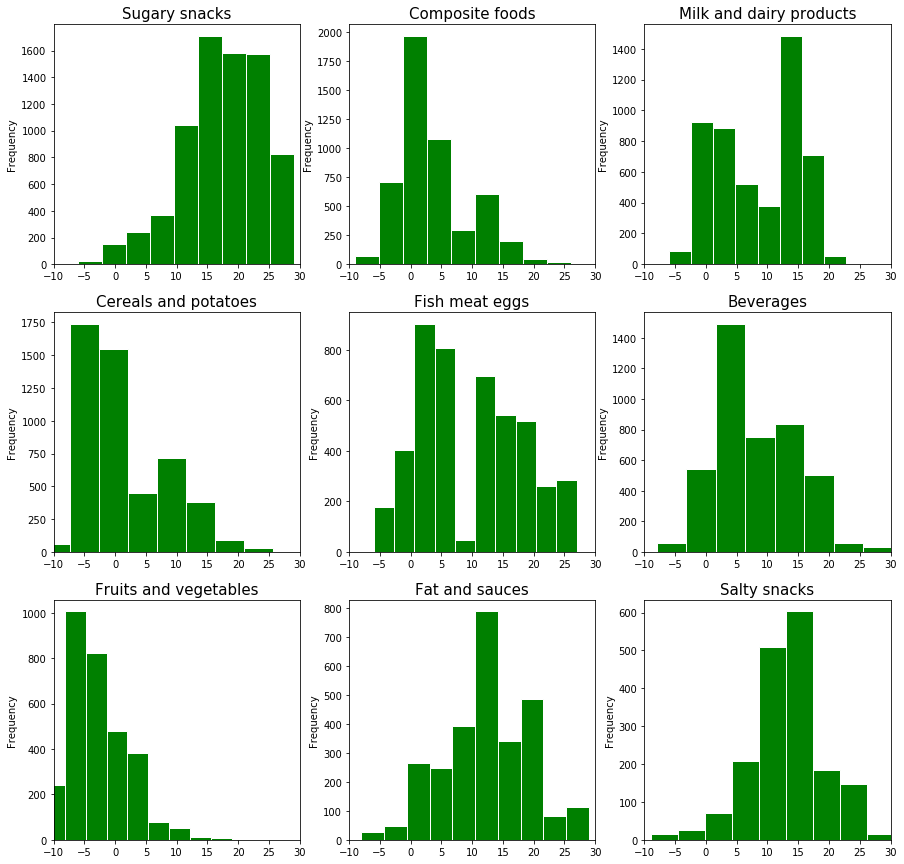

In [28]:
vect = pd.DataFrame(donnees['pnns_groups_1'].value_counts(dropna=False))
fig = plt.figure(figsize=(15,15))
for i in range(vect.shape[0]-1):
    pnns1 = vect.index[i+1]
    dat_fig = donnees[donnees.pnns_groups_1==pnns1]['nutrition-score-fr_100g']
    dat_fig = dat_fig[pd.isnull(dat_fig)==False]
    plt.subplot(3,3,i+1)
    #plt.hist(dat_fig)
    dat_fig.plot(kind='hist',color='green', edgecolor='white',label=pnns1);
    plt.xlim(-10, 30)
    plt.title(pnns1,fontsize=15)  
plt.show()

If we look at the distribution of the values for the continuous nutrition scores by categories we can see that some categories, like 'composite food' or 'Milk and Dairy produts' show some strong variability.

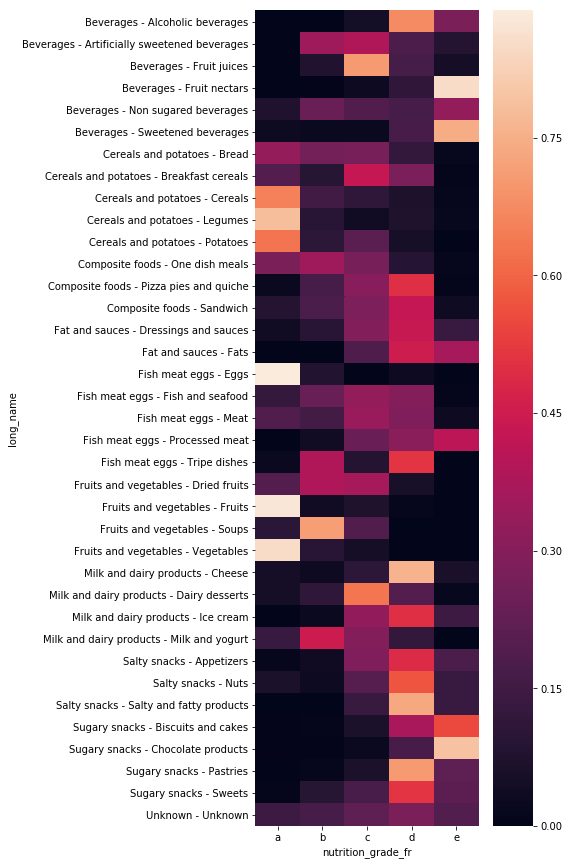

In [29]:
donnees['long_name'] = \
donnees['pnns_groups_1'] + ' - ' + donnees['pnns_groups_2']
tmp = donnees[['long_name','nutrition_grade_fr']].pivot_table(
    index='long_name',columns='nutrition_grade_fr',aggfunc=len).fillna(0)
tmp2 = pd.Series(tmp.sum(axis=1))
fig = plt.figure(figsize=(5,15))
sns.heatmap(tmp.mul(1/tmp2,axis=0))
plt.show()

Within each categories, the sub-categories can have very different nutrition grades. For instance, within 'beverages' category, 'Fruit Nectars' are mostly ranked 'E', 'Alcoholic bevergaes' mostly ranked 'D' and 'Fruit Juices' mostly ranked 'C'. 

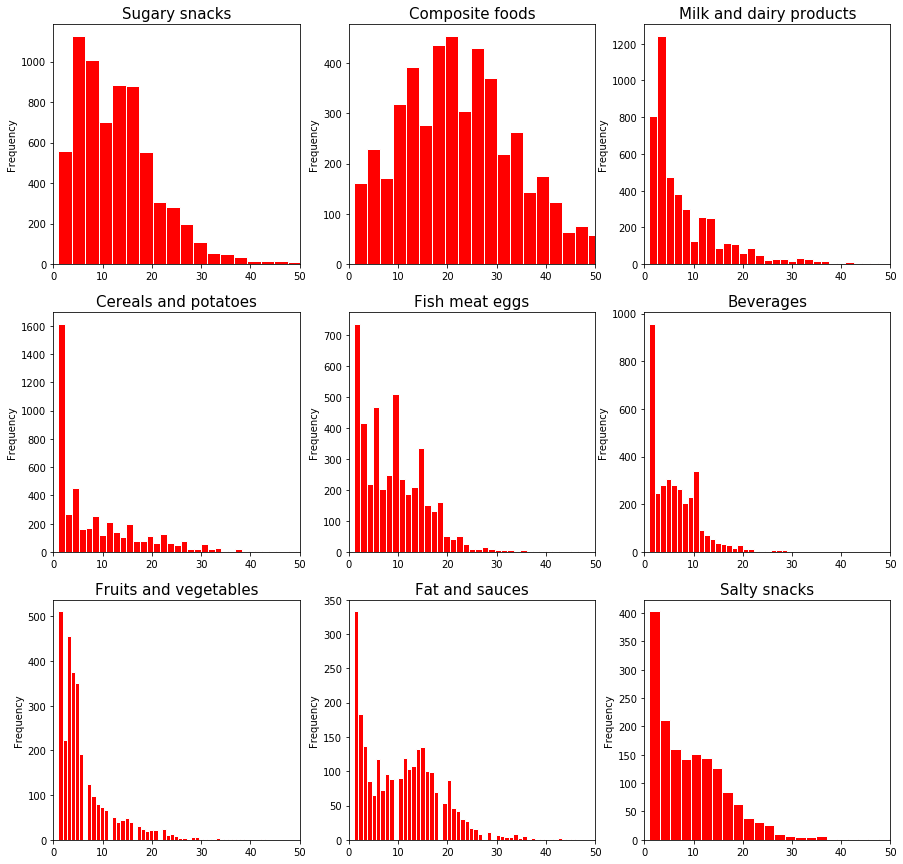

In [30]:
vect = pd.DataFrame(donnees['pnns_groups_1'].value_counts(dropna=False))
fig = plt.figure(figsize=(15,15))
for i in range(vect.shape[0]-1):
    pnns1 = vect.index[i+1]
    dat_fig = donnees[donnees.pnns_groups_1==pnns1]['nb_ingredients']
    dat_fig = dat_fig[pd.isnull(dat_fig)==False]
    plt.subplot(3,3,i+1)
    #plt.hist(dat_fig)
    dat_fig.plot(kind='hist',bins=50,color='red', edgecolor='white',label=pnns1);
    plt.xlim(0, 50)
    plt.title(pnns1,fontsize=15)  
plt.show()

Lastly, the number of ingredients vary a lot among categories because some categories are mostly composed of raw products while other are composed of highly processed products

# 6. Bonus vizualisations

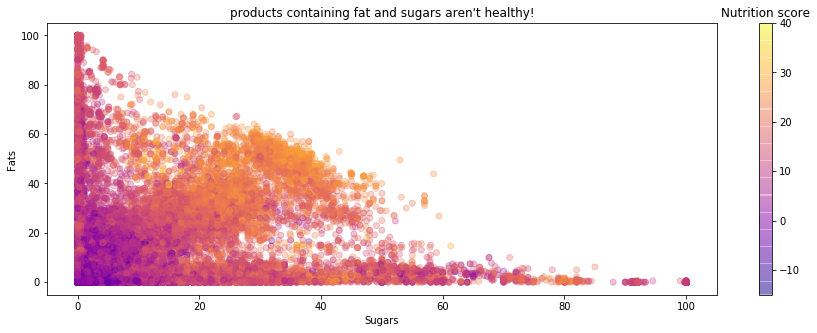

In [31]:
fig = plt.figure(figsize=(15,5))
plt.scatter(x=donnees['fat_100g'],
            y=donnees['sugars_100g'],
            c=donnees['nutrition-score-fr_100g'],
            cmap='plasma', alpha=0.3)
cbar = plt.colorbar()
cbar.ax.set_title('Nutrition score')
plt.ylabel('Fats')
plt.xlabel('Sugars')
plt.title("products containing fat and sugars aren't healthy!")
plt.show()

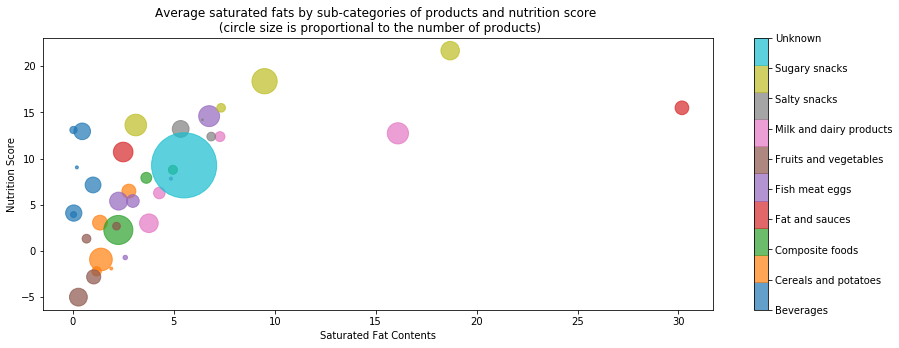

In [32]:
tmp = donnees.groupby('pnns_groups_2').agg({
    'pnns_groups_1':[lambda x:len(x),'min'],
    'nutrition-score-fr_100g':'mean',
    'saturated-fat_100g': ['mean', 'std']})
tmp.columns = ['nb_pdt','pnns1','score_mean', 'fat_mean', 'fat_std']
tmp = tmp.sort_values('pnns1')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(tmp['pnns1'])

fig = plt.figure(figsize=(15,5))
custom_cmap = plt.get_cmap('tab10',10)
plt.scatter(x=tmp['fat_mean'], y=tmp['score_mean'], s=tmp['nb_pdt']/5,
            c=le.transform(tmp['pnns1']),
            cmap=custom_cmap, alpha=0.7)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(le.classes_)
plt.ylabel('Nutrition Score')
plt.xlabel('Saturated Fat Contents')
plt.title('Average saturated fats by sub-categories of products and \
nutrition score \n (circle size is proportional to the number of \
products)')
plt.show()

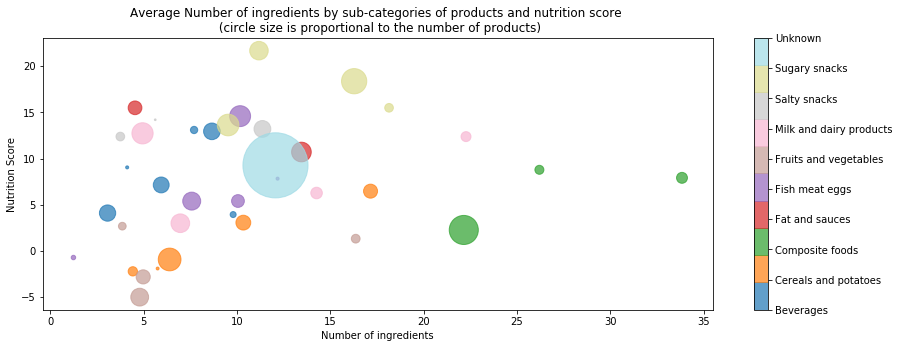

In [33]:
tmp = donnees.groupby('pnns_groups_2').agg({
    'pnns_groups_1':[lambda x:len(x),'min'],
    'nutrition-score-fr_100g':'mean',
    'saturated-fat_100g': ['mean', 'std'],
    'nb_ingredients': ['mean', 'std']
    })
tmp.columns = ['nb_pdt', 'pnns1','score_mean', 'fat_mean', 'fat_std',
               'ing_mean', 'ing_std']
tmp = tmp.sort_values('pnns1')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(tmp['pnns1'])
le.transform(tmp['pnns1'])

fig = plt.figure(figsize=(15,5))
custom_cmap = plt.get_cmap('tab20',10)
plt.scatter(x=tmp['ing_mean'], y=tmp['score_mean'], s=tmp['nb_pdt']/5,
            c=le.transform(tmp['pnns1']),
            cmap=custom_cmap, alpha=0.7)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(le.classes_)
plt.ylabel('Nutrition Score')
plt.xlabel('Number of ingredients')
plt.title('Average Number of ingredients by sub-categories of products and \
nutrition score \n (circle size is proportional to the number of \
products)')
plt.show()

